
*   Probability GrpB Quiz3
*   152120211115 Oğuzhan Sarıgöl & 152120211048 Asrınalp Şahin
*   **Expected Goals xG**

In [6]:
# Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**Kodumuzda Futbolcuların sahanın hangi noktalarından, hangi zamanlarda, hangi ayaklarıyla, vücutlarının hangi bölümleriyle ve hangi açı, mesafeden en fazla gol beklentisine girdiklerinin veri analizini yapacağız**

**Verinin Okunması ve Sütunların Karşılıkları**

1. **playerId**: Her oyuncu için benzersiz tanımlayıcı.
2. **id**: Her şut için benzersiz tanımlayıcı.
3. **x_coordinates**: Sahadaki şutun X koordinatı.
4. **y_coordinates**: Sahadaki şutun Y koordinatı.
5. **goal**: Şutun golle sonuçlanıp sonuçlanmadığını gösteren ikili gösterge (1 veya 0).
6. **time**: Oyundaki atış olayının zamanı.
7. **foot**: Şut için hangi ayağın kullanıldığının göstergesi (sağ ayak için 1, sol ayak için 0).
8. **bodypart**: Atış için hangi vücut kısmının kullanıldığının göstergesi (1 ayak için, 2 kafa için, 3 diğer için).
9. **preference**: Şutun oyuncunun tercih ettiği ayağıyla yapılıp yapılmadığını gösteren ikili gösterge (evet için 1, hayır için 0).
10. **angles**: Şutun kaleye göre yapıldığı açı.
11. **distance**: Şut çekildiğinde kaleye olan mesafe.
12. **xG**: Beklenen gol değeri, bir şutun golle sonuçlanma olasılığının ölçüsüdür.


In [8]:
from google.colab import files
uploaded = files.upload()
file_path = '/allShots.csv'
all_shots_df = pd.read_csv("/content/allShots.csv")
print(all_shots_df.head())


Saving allShots.csv to allShots.csv
   playerId         id  x_coordinates  y_coordinates  goal  time  foot  \
0     25413  177959212          92.40          27.88   1.0   2.0   1.0   
1     26150  177959247          89.25          35.36   0.0   3.0   0.0   
2     14763  177959280         100.80          35.36   1.0   4.0   1.0   
3      7868  177959289          85.05          22.44   0.0   7.0   1.0   
4      7868  177959429          78.75          20.40   0.0  14.0   1.0   

   bodypart  preferrence  angles  distance      xG  
0       1.0          1.0   26.77     14.01  0.1466  
1       2.0          1.0   25.99     15.81  0.1106  
2       3.0          1.0   78.79      4.41  0.4348  
3       2.0          0.0   15.74     23.06  0.0331  
4       1.0          1.0   12.59     29.56  0.0165  


In [9]:
df=all_shots_df.copy()

In [10]:
df.head(5)

,playerId,id,x_coordinates,y_coordinates,goal,time,foot,bodypart,preferrence,angles,distance,xG
0,25413,177959212,92.40,27.88,1.0,2.0,1.0,1.0,1.0,26.77,14.01,0.1466
1,26150,177959247,89.25,35.36,0.0,3.0,0.0,2.0,1.0,25.99,15.81,0.1106
2,14763,177959280,100.80,35.36,1.0,4.0,1.0,3.0,1.0,78.79,4.41,0.4348
3,7868,177959289,85.05,22.44,0.0,7.0,1.0,2.0,0.0,15.74,23.06,0.0331
4,7868,177959429,78.75,20.40,0.0,14.0,1.0,1.0,1.0,12.59,29.56,0.0165


In [11]:
df.tail(5)

,playerId,id,x_coordinates,y_coordinates,goal,time,foot,bodypart,preferrence,angles,distance,xG
43073,25575,90588469,81.90,41.48,0.0,85.0,1.0,2.0,0.0,16.36,24.28,0.0231
43074,25575,90588583,97.65,28.56,0.0,91.0,1.0,1.0,1.0,37.46,9.14,0.2714
43075,70410,90589205,94.50,25.84,0.0,13.0,1.0,3.0,1.0,25.19,13.30,0.0895
43076,70410,90589254,80.85,31.28,1.0,3.0,1.0,1.0,1.0,17.03,24.30,0.0461
43077,134513,90589034,91.35,27.20,0.0,16.0,1.0,1.0,1.0,24.51,15.25,0.1332


**Alt Satır İlk 5 oyuncu ID'si ve xG'sini göstermektedir.**

In [14]:

print(df.iloc[:5, [0, 11]])

   playerId      xG
0     25413  0.1466
1     26150  0.1106
2     14763  0.4348
3      7868  0.0331
4      7868  0.0165


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43078 entries, 0 to 43077
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   playerId       43078 non-null  int64  
 1   id             43078 non-null  int64  
 2   x_coordinates  43078 non-null  float64
 3   y_coordinates  43078 non-null  float64
 4   goal           43078 non-null  float64
 5   time           43078 non-null  float64
 6   foot           43078 non-null  float64
 7   bodypart       43078 non-null  float64
 8   preferrence    43078 non-null  float64
 9   angles         43078 non-null  float64
 10  distance       43078 non-null  float64
 11  xG             43078 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 3.9 MB


In [16]:
df.dtypes

playerId           int64
id                 int64
x_coordinates    float64
y_coordinates    float64
goal             float64
time             float64
foot             float64
bodypart         float64
preferrence      float64
angles           float64
distance         float64
xG               float64
dtype: object

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
playerId,43078.0,9.455561e+04,1.211014e+05,0.000000e+00,1.106600e+04,2.571400e+04,1.456920e+05,5.645120e+05
id,43078.0,2.152126e+08,3.082053e+07,8.817865e+07,1.985191e+08,2.181877e+08,2.352442e+08,2.802175e+08
x_coordinates,43078.0,8.900794e+01,8.534094e+00,1.050000e+00,8.190000e+01,9.135000e+01,9.555000e+01,1.050000e+02
y_coordinates,43078.0,3.347388e+01,9.366242e+00,0.000000e+00,2.652000e+01,3.332000e+01,4.080000e+01,6.800000e+01
goal,43078.0,1.042760e-01,3.056218e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
time,43078.0,4.864026e+01,2.656023e+01,0.000000e+00,2.600000e+01,4.900000e+01,7.100000e+01,1.030000e+02
foot,43078.0,7.549793e-01,4.301044e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
bodypart,43078.0,1.652398e+00,7.424123e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
preferrence,43078.0,8.093458e-01,3.928215e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
angles,43078.0,2.372806e+01,1.450542e+01,0.000000e+00,1.433000e+01,1.878000e+01,2.899000e+01,1.800000e+02


In [18]:
df.shape

(43078, 12)

In [19]:
df.isnull().sum()

playerId         0
id               0
x_coordinates    0
y_coordinates    0
goal             0
time             0
foot             0
bodypart         0
preferrence      0
angles           0
distance         0
xG               0
dtype: int64

In [20]:
df["xG"].fillna(0, inplace=True)

In [21]:
df['x_coordinates'].fillna(df['x_coordinates'].median(), inplace=True)
df['y_coordinates'].fillna(df['y_coordinates'].median(), inplace=True)

In [22]:
df.xG.unique()

array([0.1466, 0.1106, 0.4348, ..., 0.2293, 0.2178, 0.4101])

In [23]:
df["xG"].value_counts().count()

2132

In [24]:
df["xG"].value_counts()

xG
0.0254    316
0.0259    231
0.0211    191
0.0210    176
0.0243    175
         ... 
0.2515      1
0.2645      1
0.3995      1
0.1078      1
0.4101      1
Name: count, Length: 2132, dtype: int64

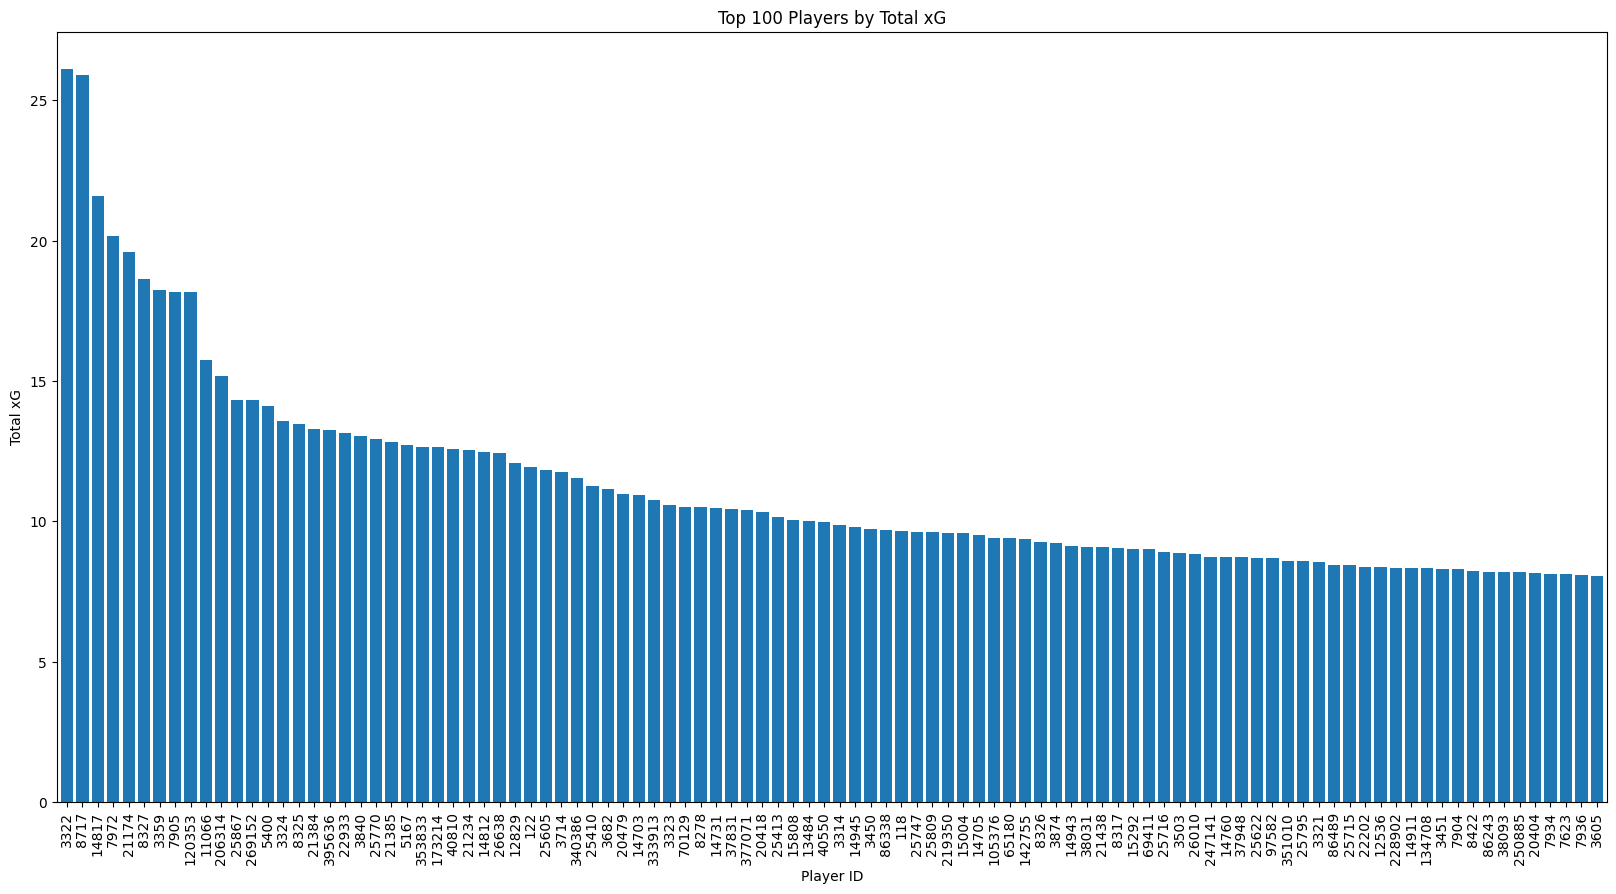

In [25]:
#En fazla toplam gol beklentisine giren ilk 100 oyuncunun Plot Bar grafiği.
all_shots_df['xG_rounded'] = all_shots_df['xG']
player_xg_totals = all_shots_df.groupby('playerId')['xG_rounded'].sum()
top_100_players = player_xg_totals.nlargest(100)
fig, ax = plt.subplots(figsize=(20, 10))
top_100_players.plot.bar(ax=ax, width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', )
ax.set_xlabel('Player ID')
ax.set_ylabel('Total xG')
ax.set_title('Top 100 Players by Total xG')
plt.show()


**Alt kısımda xG değerlerinin sayısı, mean, medyan, maksimum, minimum ve standart sapmasını hesapladık**

In [26]:
print("Count: ", str(all_shots_df["xG"].count()))
print("Mean: ", str(all_shots_df["xG"].mean()))
print("Median: ", str(all_shots_df["xG"].median()))
print("Maximum: ", str(all_shots_df["xG"].max()))
print("Minimum: ", str(all_shots_df["xG"].min()))
print("Standard Deviation: ", str(all_shots_df["xG"].std()))

Count:  43078
Mean:  0.10450623752263336
Median:  0.0707
Maximum:  0.9741
Minimum:  0.0095
Standard Deviation:  0.11231509895204474


**En fazla görülen 10 xG değerinin plot bar grafiği kullanılarak gösterimi**





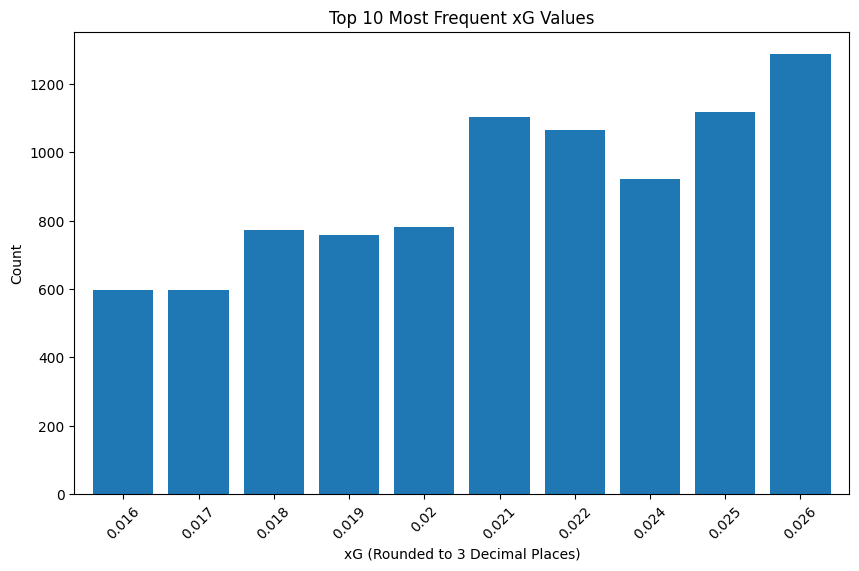

In [27]:
all_shots_df['xG_rounded'] = all_shots_df['xG'].round(3)
top_10_xg_values = all_shots_df['xG_rounded'].value_counts().nlargest(10)
fig, ax = plt.subplots(figsize=(10, 6))
top_10_xg_values.sort_index().plot.bar(ax=ax, width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
ax.set_xlabel('xG (Rounded to 3 Decimal Places)')
ax.set_ylabel('Count')
ax.set_title('Top 10 Most Frequent xG Values')
plt.show()

**xG değerlerinin yoğunluk grafiği**

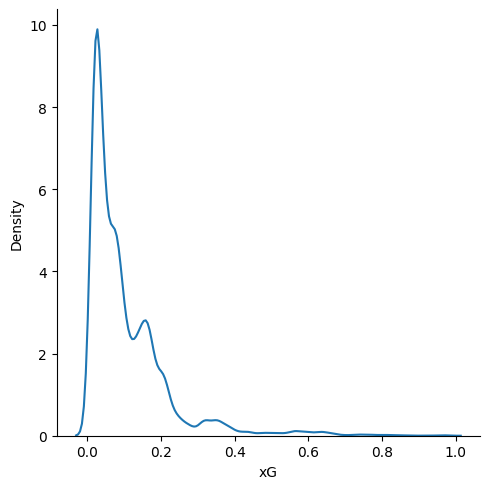

In [28]:
sns.displot(df.xG, kind="kde", bw_adjust=1)


#Şut Lokasyonuna bağlı xG Analizi
**Aşağıda futbolcuların kaleye hangi noktalardan şut çekerek en fazla gol beklentisine sahip olduğunun görselleştirilmiş hali bulunmaktadır. x_coordinates değeri arttıkça kaleye yakınlaşılmaktadır. Görüldüğü üzere futbolcular kaleye en yakın oldukları noktada daha fazla gol beklentisine girmişlerdir.**

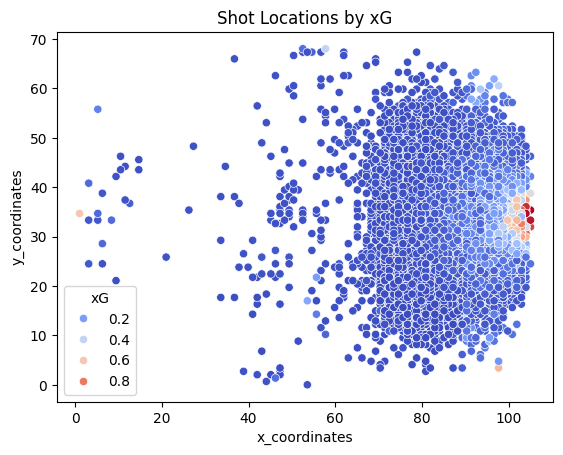

In [29]:
sns.scatterplot(data=df, x='x_coordinates', y='y_coordinates', hue='xG', palette='coolwarm')
plt.title('Shot Locations by xG')
plt.xlabel('x_coordinates')
plt.ylabel('y_coordinates')
plt.show()

# Gol Beklentisi Analizi Açı ve Mesafe Renklendirmesi ile

Aşağıda futbolcuların şut çektikleri açı ve mesafe hesaplanarak gol beklentilerinin analiz edildiği bir grafik bulunmaktadır. Futbolcuların kaleye yakın ve 90 derece civarı karşı açıdan şut çektikleri zaman daha yüksek bir gol beklentisine girmiş olduğu gözlemlenmiştir.

## Grafik: Açı, Mesafe ve Gol Beklentisi (xG)
Bu grafik, futbolcuların şut çektikleri açı (`angles`) ve mesafe (`distance`) ile gol beklentilerini (`xG`) incelemektedir. Renk kodlaması, farklı xG değerlerini temsil etmektedir.







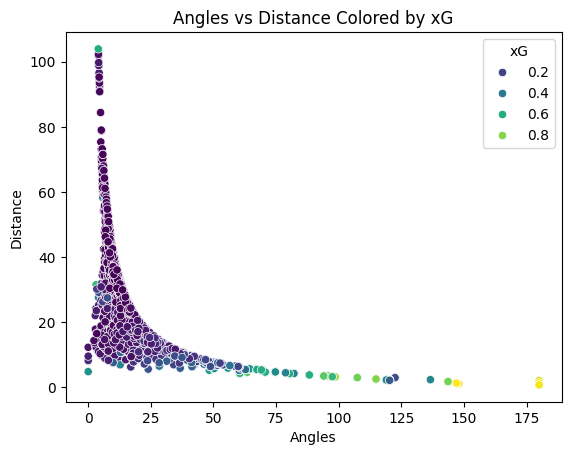

In [31]:
sns.scatterplot(data=df, x='angles', y='distance', hue='xG', palette='viridis')
plt.title('Angles vs Distance Colored by xG')
plt.xlabel('Angles')
plt.ylabel('Distance')
plt.show()


#Pair Plot Analizi: xG, Açılar ve Uzaklık
Bu pair plot, her iki özellik çifti için bir dağılım grafiği ve her bir özelliğin marjinal dağılımlarını gösteren histogramlar içerir.


*  xG ve angles: Dağılım grafiği, xG ile angles arasında belirli bir pozitif ilişki olduğunu gösteriyor. Genellikle angles arttıkça xG de artmaktadır.
angles 50'nin altındaki değerlerde xG daha yüksek gibi gözükmekte.
Histogramlarda, xG genellikle 0.0 ila 0.2 arasında yoğunlaşırken, angles ise 0 ila 50 arasında yoğunlaşmış.

*  xG ve distance: Bu grafikte, xG ile distance arasında negatif bir ilişki olduğu görülüyor. distance arttıkça xG genellikle azalmaktadır.Distance 20'nin altında olduğunda xG daha yüksek değerlere sahip olabilir.Distance histogramı, 0 ila 20 arasındaki değerlerde yoğunlaşmış.

*   Angles ve Distance:
Angles ve Distance arasında da pozitif bir ilişki gözlenebilir. distance arttıkça angles da artmaktadır. Ancak, bu ilişki xG ve angles arasındaki kadar belirgin değil. Histogramlarda, angles genellikle 0 ila 50 arasında yoğunlaşırken, distance ise 0 ila 20 arasında yoğunlaşmıştır.

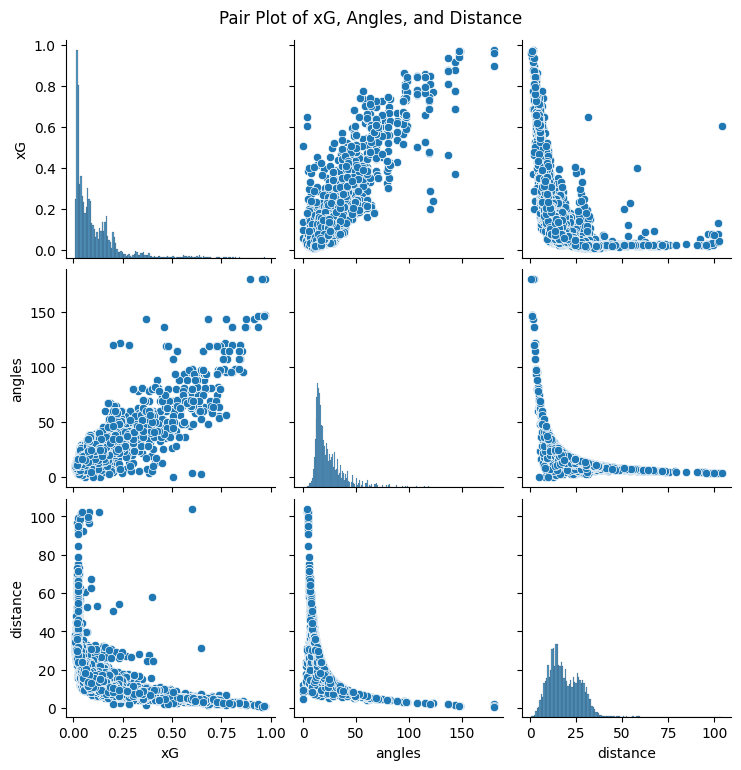

In [32]:
sns.pairplot(df[['xG', 'angles', 'distance']])
plt.suptitle('Pair Plot of xG, Angles, and Distance', y=1.02)
plt.show()


#LinePlot ile xG ve Distance Analizi

*   Mesafe azaldıkça gol beklentisindeki artış gözlemlenmiştir.
*   En çok gol beklentisi yoğunluğunun 0 ile 40 metre arasında görüldüğü gözlemlenmiştir.






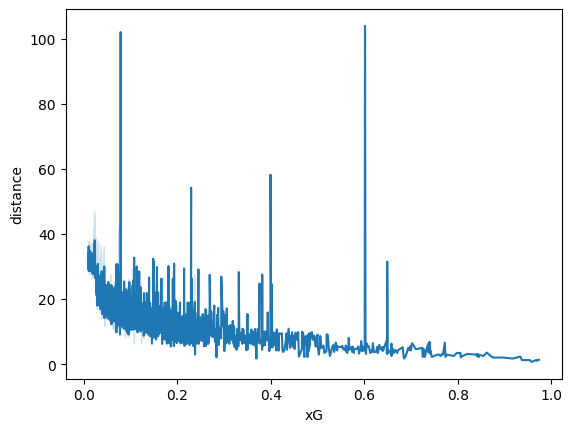

In [33]:
import matplotlib.pyplot as plt
sns.lineplot(x="xG", y="distance", data=df)
plt.show()

#Şut Çekerken Tercih Edilen Ayağa Göre Veri Analizi
Bu box plot, futbolcuların hangi ayağı kullandıklarına göre beklenen gol (xG) değerlerini görselleştirir. X ekseninde kullanılan ayaklar (0: Sol, 1: Sağ), Y ekseninde ise xG değerleri gösterilmektedir.

Box plot, her ayağın xG değerlerinin dağılımını, medyanını ve uç değerlerini gösterir. Kutular, ilgili ayağın xG değerlerinin orta yüzde 50'sini (çeyrek dilimler arasında) ve ortanca değerini (medyan) içerir. Kutuların üst ve alt çizgileri, verilerin yayılımını ve olası uç değerleri (outlier) temsil eder.

**Ayak Kullanımına Göre xG Dağılımı:**

- Sağ ayak (1) kullanıldığında xG değerleri sol ayağa (0) göre daha geniş bir dağılım gösterir. Bu, sağ ayakla atılan şutların beklenen gol değerlerinde daha büyük bir çeşitlilik olduğunu ifade eder.
- Sol ayak (0) kullanıldığında xG değerleri daha dar bir dağılım gösterir, bu da sol ayakla atılan şutların beklenen gol değerlerinde daha az çeşitlilik olduğunu gösterir.
- Medyan değerleri her iki ayak için de birbirine yakın olabilir, ancak sağ ayakla atılan şutların uç değerlerinin daha geniş bir yelpazeye sahip olduğunu belirtir.


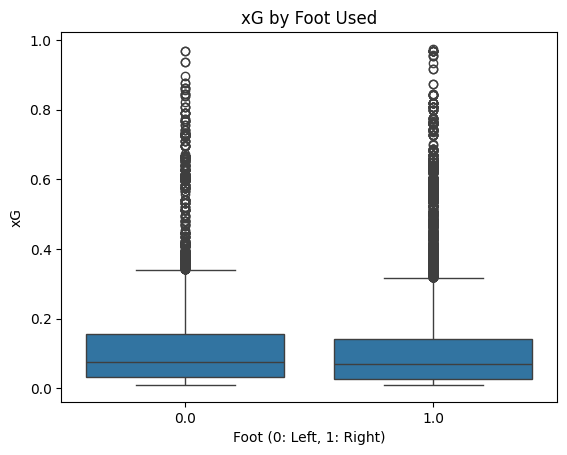

In [34]:
sns.boxplot(data=df, x='preferrence', y='xG')
plt.title('xG by Foot Used')
plt.xlabel('Foot (0: Left, 1: Right)')
plt.ylabel('xG')
plt.show()


#Maçın Dakikasına Göre Gol Beklentisi Analizi
Bu grafik, zaman içinde beklenen gol (xG) değerlerinin nasıl değiştiğini gösteriyor.X ekseninde zaman(maçtaki golün atıldığı dakika), Y ekseninde ise xG değerleri bulunuyor.
Line plot, zaman içindeki xG değerlerinin trendini gösteriyor. Bu grafik sayesinde belirli zaman dilimlerinde xG değerlerinin nasıl arttığını veya azaldığını gözlemleyebiliriz. Kısacası bu grafik, xG değerlerinin zaman içindeki eğilimlerini incelememize ve belirli zaman aralıklarında performans değerlendirmesi yapmamıza yardımcı oluyor.

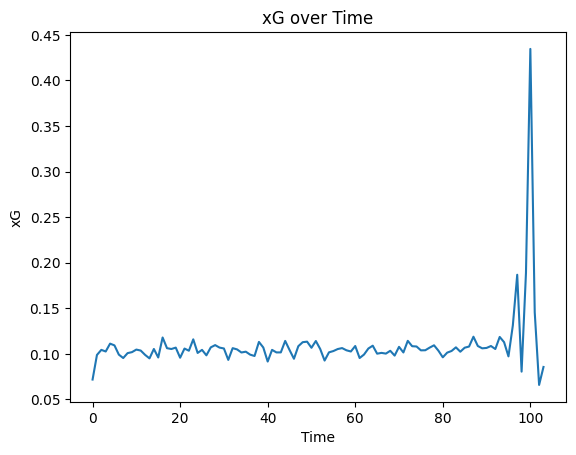

In [35]:
sns.lineplot(data=df, x='time', y='xG', errorbar=None)
plt.title('xG over Time')
plt.xlabel('Time')
plt.ylabel('xG')
plt.show()

#Kullanılan Vücut Bölgesine göre xG analizi
1.0 - Ayak, 2.0 - Kafa , 3.0 - Diğer Vücut uzuvlarına karşılık gelmektedir.

Bu grafik, farklı vücut bölgelerinin beklenen gol (xG) değerlerini karşılaştırmak için kullanılıyor. X ekseninde kullanılan vücut bölgeleri, Y ekseninde ise xG değerleri yer alıyor.

Violin plot, her vücut bölgesinin xG değerlerinin dağılımını ve yoğunluğunu gösteriyor. Bu şekilde hangi vücut bölgelerinin daha yüksek veya daha düşük xG değerlerine sahip olduğunu görebiliriz. Ayrıca, hangi vücut bölgelerinin xG değerlerinde daha geniş bir dağılım sergilediğini de anlayabiliriz. Bu grafik, futbolcuların farklı vücut bölgelerini kullanarak ne kadar etkili olduklarını analiz etmek için oldukça faydalı. Hangi vücut bölgesinin daha verimli olduğunu belirlememize yardımcı oluyor.


Alt satırdaki kodumuzda ise verimizde hangi vücut parçasıyla ne kadar şut çekildiğini hesapladık.

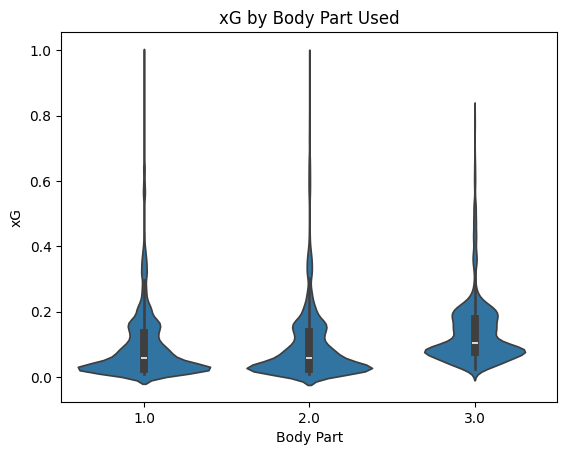

In [36]:

sns.violinplot(data=df, x='bodypart', y='xG')
plt.title('xG by Body Part Used')
plt.xlabel('Body Part')
plt.ylabel('xG')
plt.show()


In [ ]:
df=all_shots_df.copy()

In [37]:
#Hangi bodypart ile ne kadar şut çekildiğini anlamamıza yarayan kod.
if 'bodypart' in df.columns and not df['bodypart'].isnull().all():
    bodypart_counts = df['bodypart'].value_counts().reset_index()
    bodypart_counts.columns = ['bodypart', 'count']
    print("\nCount of shots by each body part:")
    print(bodypart_counts)
    if not bodypart_counts.empty:
        most_frequent_bodypart = bodypart_counts.iloc[0]
        print(f"\nThe most frequently used body part for shots is: {most_frequent_bodypart['bodypart']} with {most_frequent_bodypart['count']} shots")
    else:
        print("\nNo data available for body parts.")
else:
    print("\nThe 'bodypart' column is missing or contains no valid data.")


Count of shots by each body part:
   bodypart  count
0       1.0  21961
1       2.0  14130
2       3.0   6987

The most frequently used body part for shots is: 1.0 with 21961.0 shots


#Sütunların arasındaki ilişkileri anlamamıza yarayan Korelasyon Heatmap'i
Bu korelasyon heatmap'i, 'allShots.csv' dosyasındaki çeşitli sütunlar arasındaki ilişkileri görselleştirir. Korelasyon katsayıları, iki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü gösterir. Katsayılar -1 ile 1 arasında değişir, burada:

1: Pozitif tam korelasyon (bir değişken artarken diğeri de artar)
0: Korelasyon yok (değişkenler arasında doğrusal bir ilişki yoktur)
-1: Negatif tam korelasyon (bir değişken artarken diğeri azalır)
Heatmap'teki renkler bu korelasyon katsayılarını görselleştirir:

Koyu kırmızı: Pozitif korelasyon
Koyu mavi: Negatif korelasyon
Beyaz/gri tonları: Zayıf veya hiç korelasyon yok
Örnekler üzerinden bazı ilişkileri inceleyelim:

xG (Beklenen Gol) ile Diğer Değişkenler:

xG ve açı arasında yüksek pozitif korelasyon (
𝑟
=
0.88
r=0.88). Bu, açı arttıkça beklenen gol olasılığının da arttığını gösterir.
xG ve mesafe arasında güçlü negatif korelasyon (
𝑟
=
−
0.69
r=−0.69). Bu, mesafe arttıkça beklenen gol olasılığının azaldığını gösterir.
xG ve x_koordinatları arasında orta düzeyde pozitif korelasyon (
𝑟
=
0.60
r=0.60). Bu, x_koordinatları arttıkça beklenen gol olasılığının da arttığını gösterir.
x_koordinatları ile Diğer Değişkenler:

x_koordinatları ve mesafe arasında çok güçlü negatif korelasyon (
𝑟
=
−
0.95
r=−0.95). Bu, x_koordinatları arttıkça mesafenin azaldığını gösterir.
goal (Gol) ile Diğer Değişkenler:

goal ve açı arasında pozitif korelasyon (
𝑟
=
0.33
r=0.33). Bu, açı arttıkça gol olasılığının da arttığını gösterir.
Bu korelasyon heatmap'i, verisetindeki değişkenler arasındaki ilişkileri hızlıca görselleştirmenizi ve hangi değişkenlerin birbiriyle daha güçlü ilişkili olduğunu anlamanızı sağlar. Bu tür bir analiz, özellikle modelleme veya öngörü çalışmaları yaparken önemli olabilir.

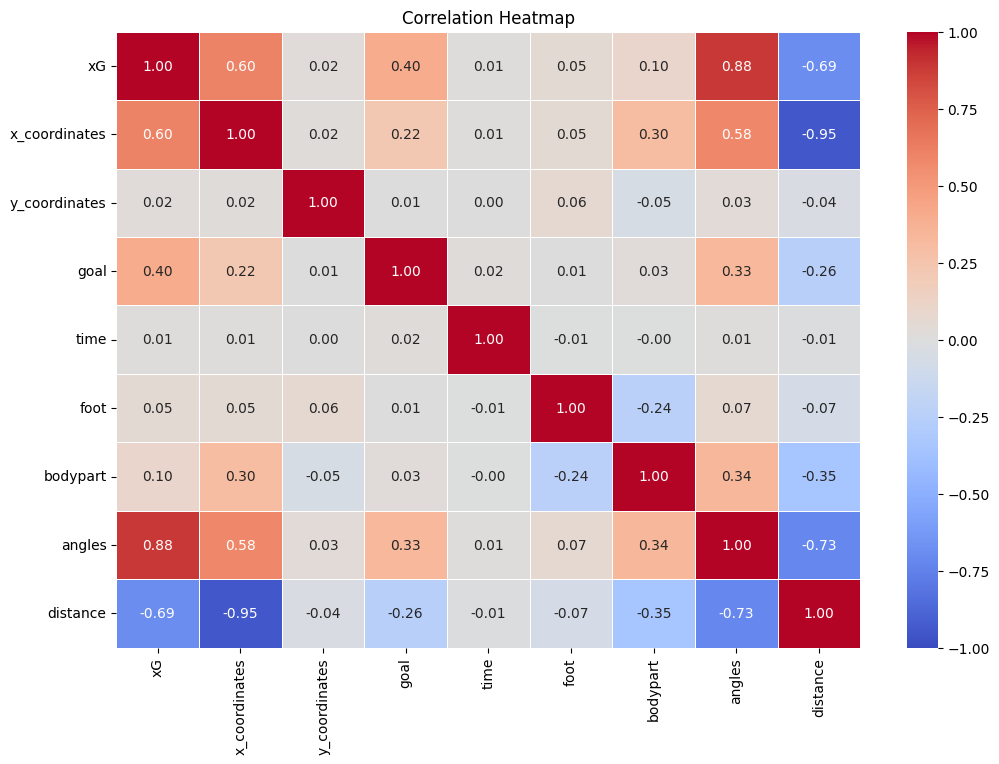

In [38]:

columns_of_interest = ['xG', 'x_coordinates', 'y_coordinates', 'goal', 'time', 'foot', 'bodypart', 'angles', 'distance']
data_subset = df[columns_of_interest]
corr_matrix = data_subset.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#IQR Yöntemi ile Aykırı Değerleri Belirleme

Analizde kullanılan IQR (Interquartile Range) yöntemi, 'xG' değerlerinin 1. çeyreklik (Q1) ve 3. çeyreklik (Q3) değerlerine göre ne kadar uzaklaştığını ölçer. Eğer bir değer, Q1'den 1.5 * IQR daha küçük veya Q3'ten 1.5 * IQR daha büyükse, bu değer aykırı kabul edilir. Aykırı değerler, veri setinde olağan dışı değerleri temsil eder. Bu analiz sonucunda, toplamda kaç tane aykırı değer olduğu belirlenir ve bu sayı bir tablo olarak sunulur.

Aykırı değerlerin görselleştirilmesi için bir kutu grafiği oluşturulmuştur. Kutu grafiği, 'xG' değerlerinin dağılımını ve aykırı değerleri net bir şekilde gösterir. Grafikte, kutunun içindeki çizgi medyanı, kutunun uçları ise verinin ilk ve üçüncü çeyreklik dilimlerini (Q1 ve Q3) temsil eder. Kutunun dışında kalan noktalar, aykırı değerleri gösterir. Bu noktalar, verinin büyük kısmının dışında kalan, olağan dışı değerlerdir.








Aykırı değer sayısı: 2161


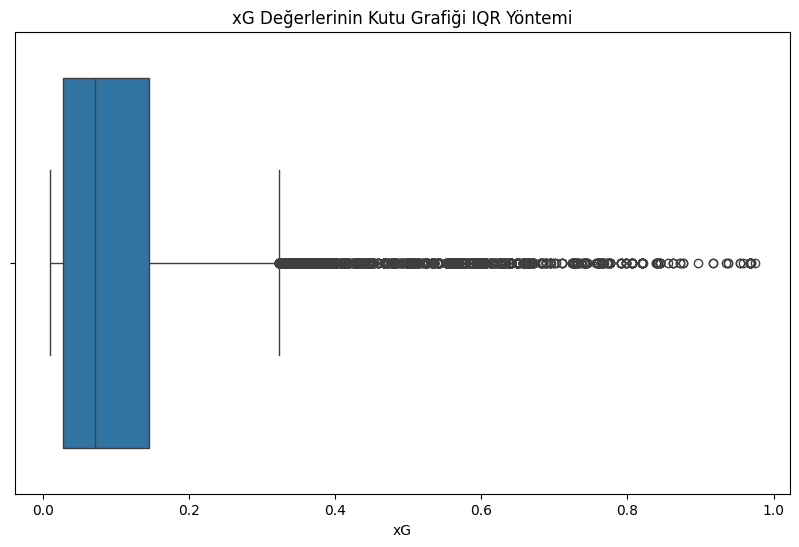

In [39]:

# xG sütununu seç
xG = df['xG']

# IQR yöntemi ile aykırı değerleri belirleme
Q1 = xG.quantile(0.25)
Q3 = xG.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(xG < lower_bound) | (xG > upper_bound)]

# Aykırı değer sayısını yazdır
print(f"Aykırı değer sayısı: {outliers.shape[0]}")

# Aykırı değerlerin grafiğini oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x=xG)
plt.title('xG Değerlerinin Kutu Grafiği IQR Yöntemi')
plt.xlabel('xG')
plt.show()

#Z-score Yöntemi ile Aykırı Değerleri Belirleme

Analizde kullanılan Z-score yöntemi, 'xG' değerlerinin ortalama ve standart sapmasına göre ne kadar uzaklaştığını ölçer. Eğer bir değer, ortalamadan 3 standart sapma daha uzaksa (Z-score > 3 veya Z-score < -3), bu değer aykırı kabul edilir. Aykırı değerler, veri setinde olağan dışı değerleri temsil eder. Bu analiz sonucunda, toplamda kaç tane aykırı değer olduğu belirlenir ve bu sayı bir tablo olarak sunulur. Aykırı değerlerin görselleştirilmesi için bir kutu grafiği oluşturulmuştur. Kutu grafiği, 'xG' değerlerinin dağılımını ve aykırı değerleri net bir şekilde gösterir. Grafikte, kutunun içindeki çizgi medyanı, kutunun uçları ise verinin ilk ve üçüncü çeyreklik dilimlerini (Q1 ve Q3) temsil eder. Kutunun dışında kalan noktalar, aykırı değerleri gösterir. Bu noktalar, verinin büyük kısmının dışında kalan, olağan dışı değerlerdir.

Aykırı değer sayısı: 970


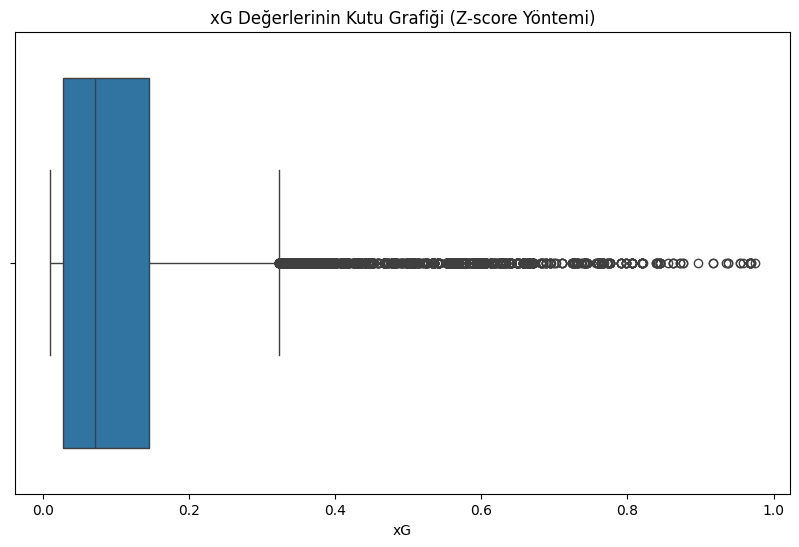

In [40]:

xG = df['xG']

# Z-score yöntemi ile aykırı değerleri belirleme
mean_xG = np.mean(xG)
std_xG = np.std(xG)
z_scores = (xG - mean_xG) / std_xG

# Aykırı değerlerin belirlenmesi (Z-score > 3 veya Z-score < -3)
outliers = df[(z_scores > 3) | (z_scores < -3)]

# Aykırı değer sayısını yazdır
print(f"Aykırı değer sayısı: {outliers.shape[0]}")

# Aykırı değerlerin grafiğini oluşturma
plt.figure(figsize=(10, 6))
sns.boxplot(x=xG)
plt.title('xG Değerlerinin Kutu Grafiği (Z-score Yöntemi)')
plt.xlabel('xG')
plt.show()